In [232]:
import pandas as pd
import numpy as np

# from pymongo import MongoClient

import re

#fixed issue with ascii encoding errors
import sys

reload(sys)
sys.setdefaultencoding("utf-8")
#TODO: countvectorizer (ignores punctuation), nltk tokenizer

from nltk.tokenize import *

In [241]:
poemdf = pd.read_pickle('resultdf.pkl')

some poem videos made it in the data so we need to remove them

In [243]:
poemdf.columns
# coltouse = ['poem_link', 'poet_poems_url','poem_yrpub','poem_title','poem_text']
# poemdf = rawpoem.loc[rawpoem['poem_title'] ][coltouse]

poemdf = poemdf.loc[poemdf['poem_link'].str.contains('video') == False]

In [245]:
poemdf.head()

,poet_name,poet_url,poet_poems_url,tags,poet_bio,yr_born,yr_died,city,state,country,...,tag2,tag3,tag4,dead,current_age,age_dead,poem_title,poem_yrpub,poem_text,poem_link
0,Taylor Mali,http://www.poets.org/poetsorg/poet/taylor-mali,http://www.poets.org/poetsorg/poems/406436,[Slam/SpokenWord],Taylor Mali is a four-time National Poetry Sla...,0,0,,,,...,NaN,NaN,NaN,0,0,0,My Deepest Condiments,2014,"[I send you my deepest condiments, was in no w...",http://www.poets.org/poetsorg/poem/my-deepest-...
1,Richard Garcia,http://www.poets.org/poetsorg/poet/richard-garcia,http://www.poets.org/poetsorg/poems/45709,[Contemporary],Richard Garcia is the author of five books of ...,0,0,,,,...,NaN,NaN,NaN,0,0,0,Autumn,2006,"[\nBoth lying on our sides, making love in\nsp...",http://www.poets.org/poetsorg/poem/autumn-0
2,William Matthews,http://www.poets.org/poetsorg/poet/william-mat...,http://www.poets.org/poetsorg/poems/45636,[Objectivists],"Born in Cincinnati, Ohio, on November 11, 1942...",1942,1997,Cincinnati,,United States,...,NaN,NaN,NaN,1,0,55,The Bear at the Dump,1995,[\nAmidst the too much that we buy and throw\n...,http://www.poets.org/poetsorg/poem/bear-dump
3,A. R. Ammons,http://www.poets.org/poetsorg/poet/r-ammons,http://www.poets.org/poetsorg/poems/44389,[Surrealism],Archie Randolph Ammons was born outside Whitev...,1926,2001,,,,...,NaN,NaN,NaN,1,0,75,In Memoriam Mae Noblitt,1981,"[\nThis is just a place:\nwe go around, distan...",http://www.poets.org/poetsorg/poem/memoriam-ma...
4,A. R. Ammons,http://www.poets.org/poetsorg/poet/r-ammons,http://www.poets.org/poetsorg/poems/44389,[Surrealism],Archie Randolph Ammons was born outside Whitev...,1926,2001,,,,...,NaN,NaN,NaN,1,0,75,Still,1986,[\nI said I will find what is lowly\nand put t...,http://www.poets.org/poetsorg/poem/still


In [246]:
def countlines(text):
    expression ='.+\n'
    strtext = u''.join(text)
    if len(re.findall(expression,strtext)) == 0:
        numnewl = len(text)
    else:
        numnewl = len(re.findall(expression, strtext))
    return float(numnewl)

def countstanza(text):
    excexpression = '.+\n'
    expression = '.+\n\n'
    strtext = u''.join(text)
    numstanzas = 0
    if len(re.findall(excexpression,strtext)) == 0:
        for i in text:
            if len(str(i)) ==0:
                numstanzas += 1
    else:
        numstanzas = len(re.findall(expression, strtext))
    return float(numstanzas+1)

In [247]:
poemdf['numlines'] = poemdf['poem_text'].apply(lambda x: countlines(x))
poemdf['numstanzas'] = poemdf['poem_text'].apply(lambda x: countstanza(x))

In [248]:
poemdf.numstanzas.mean()
# poemdf.groupby(['poet_poems_url'])['numstanzas'].mean()

5.545081967213115

In [249]:
def sent_avglines(text):
    nlines = []
    text = u''.join(text)
    t_sent = sent_tokenize(text)
    for i in t_sent:
        nlines.append(countlines(i))
    return np.mean(nlines)

In [250]:
poemdf['avgline_stanza'] = poemdf['numlines']/poemdf['numstanzas']

In [251]:
def count_words(text, distinct = False):    
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized = tokenizer.tokenize(u''.join(text))
    numwords = len(tokenized)
    if distinct:
        numwords = len(list(set(tokenized)))
    return numwords            

In [252]:
poemdf['wordcount'] = poemdf['poem_text'].apply(lambda x: count_words(x))
poemdf['wordcount_d'] = poemdf['poem_text'].apply(lambda x: count_words(x,True))
poemdf['ttr'] = poemdf['wordcount_d']/poemdf['wordcount']

In [253]:
def grab_numerical(text):
    number = 0
    try:
        text = u''.join(re.findall('\\d+', text))
        number = int(text)
    except:
        pass
    return number    

In [254]:
poemdf['yrpub'] = poemdf['poem_yrpub'].map(lambda x: grab_numerical(x))

In [255]:
poemdf['sentences'] = poemdf['poem_text'].map(lambda x: sent_tokenize(u' '.join(x)))

In [256]:
poemdf['num_sentences']= poemdf['poem_text'].map(lambda x: len(sent_tokenize(u' '.join(x))))

In [257]:
from nltk.corpus import stopwords
# from nltk import *
from nltk.corpus import wordnet as wn

In [258]:
hyper = lambda x: x.hypernyms()
hypo = lambda x: x.hyponyms()

In [259]:
from nltk.wsd import lesk
from nltk import word_tokenize, pos_tag

In [260]:
def calculate_scores(synset):
    a_score = 1
    c_score = 1
    for closure in synset.closure(hyper):
#         print closure.name()
        if closure.name().startswith("abstraction"):
            a_score +=1
        if closure.name().startswith("physical"):
            c_score +=1
    return float(a_score)/float(c_score)
    

def abstraction_score(text, uselesk = False):
    nouns = []
    for sent in text:
        nouns.append([token for token, pos in pos_tag(word_tokenize(sent)) if pos.startswith('N')])
#         print nouns
    nouns = [item for sublist in nouns for item in sublist]
    
    scores=[]
    for i in nouns:
        if uselesk:
            y = lesk(sent, i)
            if y is not None:
#                 print y.definition()
                scores.append(calculate_scores(y))
        else:
            synsets = wn.synsets(i, "n")
            for synset in synsets:
#                 print synset
                scores.append(calculate_scores(synset))
    
    return np.mean(scores)

In [261]:
t0= time.clock()
poemdf['abstraction_score'] = poemdf['sentences'].apply(lambda x: abstraction_score(x))
print time.clock() - t0, "seconds process time"
t0= time.clock()
poemdf['lesk_abs_score'] = poemdf['sentences'].apply(lambda x: abstraction_score(x, True))
print time.clock() - t0, "seconds process time"

In [267]:
poemdf['age_yrpub']= poemdf['yrpub']-poemdf['yr_born']
# poemdf.groupby(['primary_tag'])['lesk_abs_score'].mean()

In [271]:
poemdf['age_yrpub']= poemdf['age_yrpub'].map(lambda x: 0 if (x>1000 or x<0) else x)

In [302]:
poemdf.groupby(['yrpub'])['lesk_abs_score'].mean()
poemdf.loc[(poemdf['yr_born'] < 1800)&(poemdf['yr_born'] !=0)]

,poet_name,poet_url,poet_poems_url,tags,poet_bio,yr_born,yr_died,city,state,country,...,avgline_stanza,wordcount,wordcount_d,ttr,yrpub,sentences,num_sentences,abstraction_score,lesk_abs_score,age_yrpub
78,Thomas Traherne,http://www.poets.org/poetsorg/poet/thomas-trah...,http://www.poets.org/poetsorg/poems/45563,[Surrealism],"In 1637, Thomas Traherne, the son of a shoemak...",1636,1674,,,,...,7.272727,467,273,0.584582,1910,[\nIn unexperienced infancy\nMany a sweet mist...,18,1.301449,1.177419,274
495,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,30.000000,167,124,0.742515,1772,[O Thou bright jewel in my aim I strive To com...,11,1.530506,1.413462,19
496,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,2.500000,306,216,0.705882,1773,"[\n I., Adieu, New-England's smil...",31,1.327619,1.222727,20
497,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,8.000000,61,56,0.918033,1772,[\n'Twas mercy brought me from my Pagan land...,3,1.298507,1.075000,19
498,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,8.400000,329,234,0.711246,1775,"[\n Celestial choir!, enthron'd in realms of...",22,1.311245,1.213740,22
499,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,34.000000,258,174,0.674419,1772,[\n To show the lab'ring bosom's deep intent...,12,1.522592,1.264310,19
500,Phillis Wheatley,http://www.poets.org/poetsorg/poet/phillis-whe...,http://www.poets.org/poetsorg/poems/45891,[Formalism],Phillis Wheatley was the first black poet in A...,1753,1784,,,,...,43.000000,347,251,0.723343,1772,"[\nHAIL, happy day, when, smiling like the mor...",8,1.423970,1.258333,19
501,Thomas Wyatt,http://www.poets.org/poetsorg/poet/thomas-wyatt,http://www.poets.org/poetsorg/poems/45576,[Formalism],"In 1503, Sir Thomas Wyatt was born at Allingto...",1502,1542,,,,...,7.000000,163,123,0.754601,1556,"[\nThey flee from me, that sometime did me see...",6,1.379845,1.257576,54
502,Thomas Wyatt,http://www.poets.org/poetsorg/poet/thomas-wyatt,http://www.poets.org/poetsorg/poems/45576,[Formalism],"In 1503, Sir Thomas Wyatt was born at Allingto...",1502,1542,,,,...,14.000000,107,85,0.794393,1556,[\nMy galley charged with forgetfulness\n Th...,2,1.434588,1.279070,54
1427,Alexander Pope,http://www.poets.org/poetsorg/poet/alexander-pope,http://www.poets.org/poetsorg/poems/46201,[Formalism],"In the Spring of 1688, Alexander Pope was born...",1688,1744,,,,...,73.500000,2301,1008,0.438070,1733,"[\n I., Know, then, thyself, presume not God t...",73,1.496022,1.300920,45


In [323]:
text = poemdf.sentences[100]
tokens= []
for sent in text:
    tokens.append([token for token, pos in pos_tag(word_tokenize(sent)) if pos.startswith('PRP')])
tokens = [item for sublist in tokens for item in sublist]


In [330]:
len(list(set(tokens)))/float(330)

0.05454545454545454

In [359]:
def pronoun_score(text):
    """Returns number of distinct pronouns"""
    pronouns = []
    imp_words = []
    list_words = ['i','me','my','you','we','us','myself', 'ourself','ourselves','yourselves']
    for sent in text:
        pronouns.append([token for token, pos in pos_tag(word_tokenize(sent))if pos.startswith('PRP')])
#         print nouns
    pronouns = [item for sublist in pronouns for item in sublist]
    imp_words = set(pronouns).intersection(list_words)        
    return float(len(imp_words))

In [361]:
poemdf['pronoun_score'] = poemdf['sentences'].map(lambda x: pronoun_score(x))
poemdf['pronoun_score'] = poemdf['pronoun_score']/poemdf['wordcount_d']

In [389]:
poemdf.columns
poemdf.to_pickle('abscalc.pkl')

In [390]:
cols = ['yrpub', 'numlines','numstanzas', 'avgline_stanza','ttr','abstraction_score','lesk_abs_score','pronoun_score']
cleandf = poemdf[cols]

In [391]:
cleandf.head()

,yrpub,numlines,numstanzas,avgline_stanza,ttr,abstraction_score,lesk_abs_score,pronoun_score
0,2014,29,1,29.000000,0.790323,1.425791,1.160494,0.030612
1,2006,14,4,3.500000,0.688406,1.347701,1.285714,0.010526
2,1995,35,1,35.000000,0.630662,1.207051,1.133333,0.022099
3,1981,40,13,3.076923,0.633540,1.341486,1.189655,0.019608
4,1986,45,7,6.428571,0.580508,1.460286,1.284483,0.021898


In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

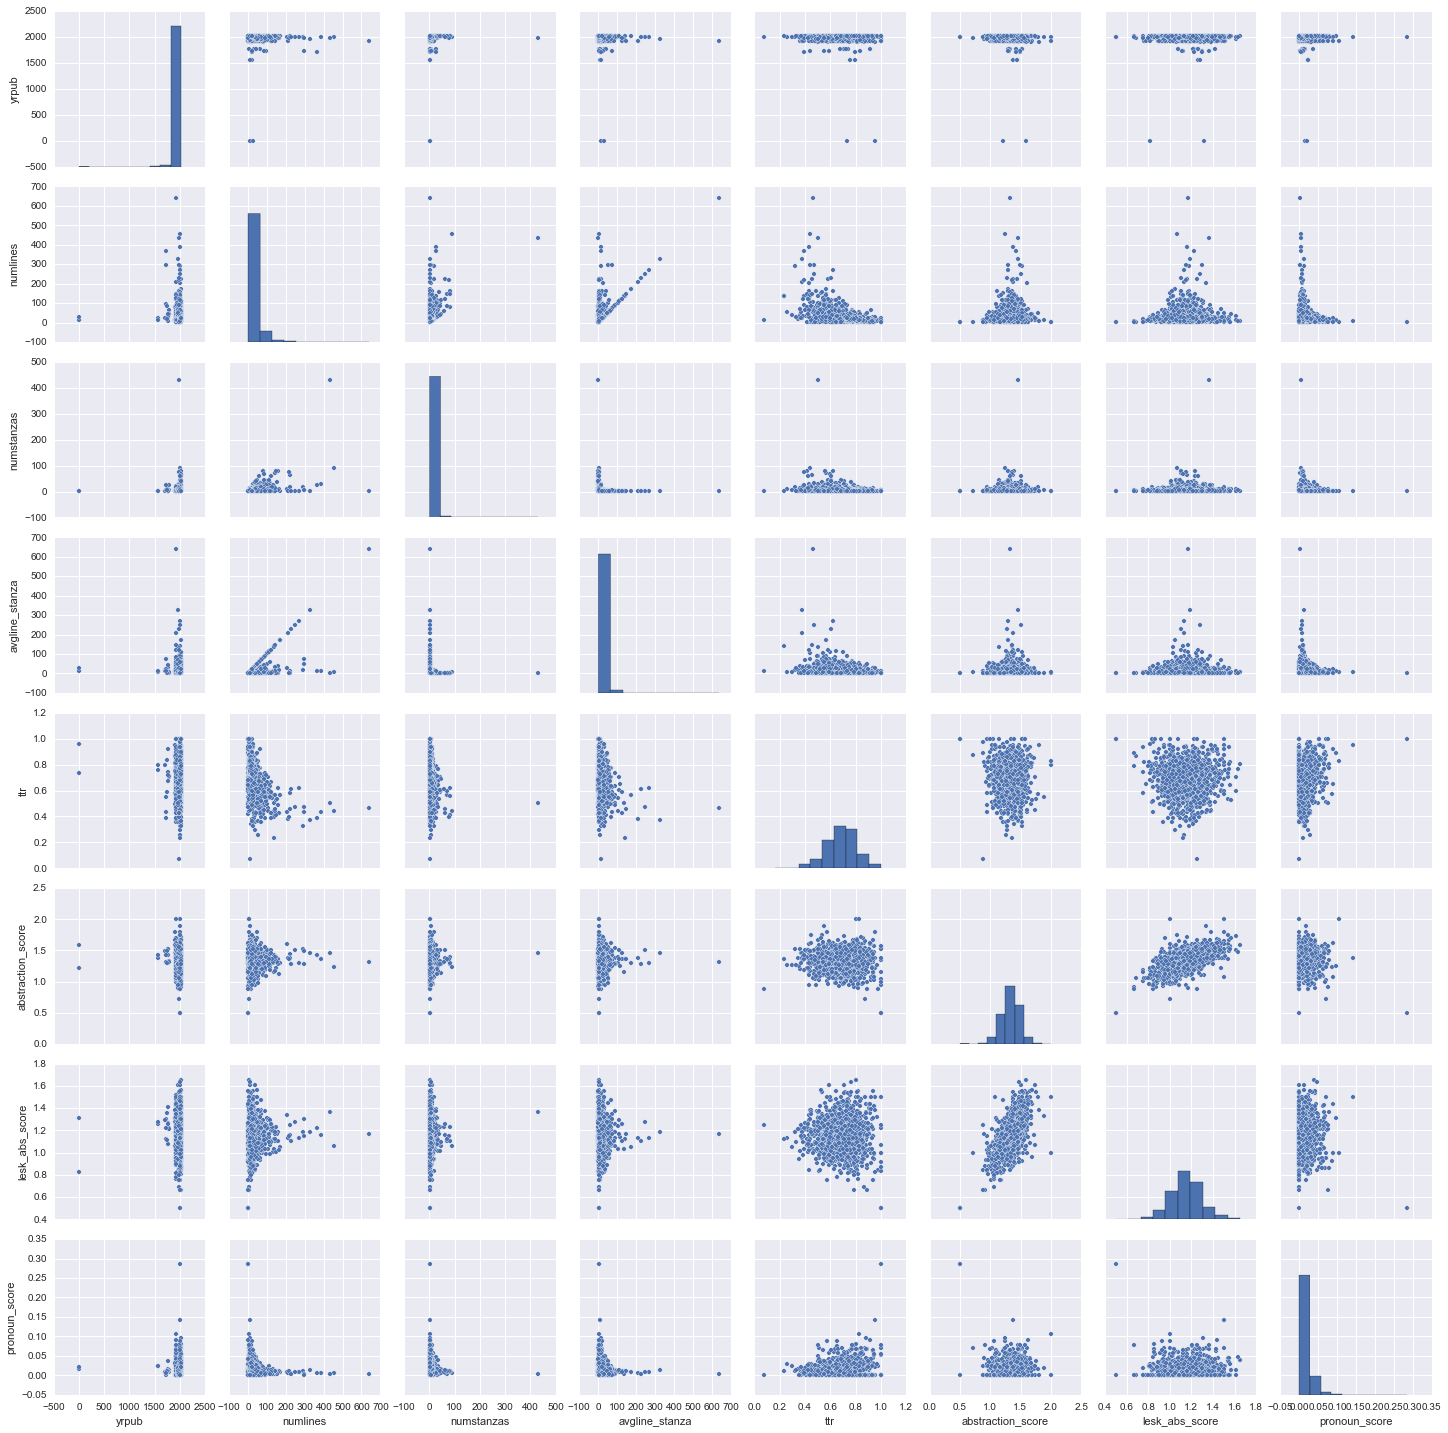

In [392]:
a = cleandf.ix[:, :]
sns.pairplot(a)